In [33]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

# Đọc dữ liệu

In [34]:
df_playlists = pd.read_csv('playlist.csv')

In [35]:
df_playlists

,playlist_id,playlist_name,playlist_url,owner_id,username,playlist_time,playlist_tag,like,repost,size,tracks
0,0,Lat3 Nit3,https://www.soundcloud.com/latenit3/sets/lat3-...,1893,Latenit3,2017-04-21T12:05:32.000Z,NaN,20,3,0,[]
1,1,lofi 4 studying,https://www.soundcloud.com/suricolbert/sets/lo...,1894,suri,2017-02-20T01:17:24.000Z,Hip-hop & Rap,210,8318,86,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,2,Lowfi hip hop chills,https://www.soundcloud.com/nuedenk/sets/lowfi-...,1895,Nix,2017-03-10T07:58:45.000Z,Lofi Hip Hop,203,20,135,"[86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 9..."
3,3,Late Night Drive,https://www.soundcloud.com/lordafi/sets/sweg,1896,TMN Playlisted,2014-07-21T07:00:32.000Z,Dance & EDM,75,5122,45,"[219, 220, 221, 222, 223, 224, 225, 226, 227, ..."
4,4,Late Night Lofi,https://www.soundcloud.com/ilyanaazman/sets/la...,1897,Ilyana Azman,2017-08-14T13:00:19.000Z,NaN,48,2372,40,"[264, 265, 266, 267, 57, 268, 269, 270, 271, 2..."
...,...,...,...,...,...,...,...,...,...,...,...
304,304,80'an,https://www.soundcloud.com/pbgcheat/sets/80an,2160,Lagu Lawas Indonesia 90an,2016-09-07T12:32:43.000Z,NaN,745,123,0,[]
305,305,8lyaaaa,https://www.soundcloud.com/user374368488/sets/...,2161,user374368488,2014-05-13T18:45:50.000Z,NaN,0,0,282,"[25853, 25854, 25855, 25856, 25857, 25858, 258..."
306,306,88388,https://www.soundcloud.com/shamma-alfahim-1302...,2162,XSF9,2020-08-19T20:49:00.000Z,NaN,6,0,205,"[26075, 26076, 26077, 26078, 12021, 26079, 121..."
307,307,80s arabic,https://www.soundcloud.com/mito-mito-715670362...,2163,Mito Mito,2017-03-09T18:56:39.000Z,NaN,41,2,303,"[11605, 11597, 12750, 11667, 12887, 11568, 116..."


Dữ liệu có 309 dòng và 11 cột

# Ý nghĩa các cột
- playlist_id: mã định danh playlist
- playlist_name: tên playlist
- playlist_url: đường dẫn đến playlist
- owner_id: mã chủ sở hữu playlist
- username: tên chủ sở hữu
- playlist_time: ngày xuất bản
- playlist_tag: thể loại của playlist
- like: số lượt thích
- repost: số lượng đăng lại
- size: số lượng các track trong playlist
- tracks: các track trong playlist

# kiểu dữ liệu các cột

In [36]:
df_playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   playlist_id    309 non-null    int64 
 1   playlist_name  309 non-null    object
 2   playlist_url   309 non-null    object
 3   owner_id       309 non-null    int64 
 4   username       309 non-null    object
 5   playlist_time  309 non-null    object
 6   playlist_tag   70 non-null     object
 7   like           309 non-null    int64 
 8   repost         309 non-null    int64 
 9   size           309 non-null    int64 
 10  tracks         309 non-null    object
dtypes: int64(5), object(6)
memory usage: 26.7+ KB


# Các thông số cơ bản của các cột

In [37]:
df_playlists.describe()

,playlist_id,owner_id,like,repost,size
count,309.000000,309.000000,309.000000,309.000000,309.000000
mean,154.000000,1944.207120,561.110032,496.792880,110.317152
std,89.344838,345.646856,1683.387834,1409.731418,149.263918
min,0.000000,124.000000,0.000000,0.000000,0.000000
25%,77.000000,1948.000000,2.000000,0.000000,5.000000
50%,154.000000,2013.000000,16.000000,2.000000,21.000000
75%,231.000000,2090.000000,113.000000,90.000000,216.000000
max,308.000000,2164.000000,9808.000000,9193.000000,500.000000


# Dữ liệu có bị duplicate không ?

In [38]:
num_duplicated_rows = df_playlists.index.duplicated().sum()
print(num_duplicated_rows)

0


# Dữ liệu có bị mất không ? 

In [39]:
df_playlists.isnull().sum()

playlist_id        0
playlist_name      0
playlist_url       0
owner_id           0
username           0
playlist_time      0
playlist_tag     239
like               0
repost             0
size               0
tracks             0
dtype: int64

Cột playlist_tag bị mất dữ liệu

# Xử lý missing 

In [40]:
df_playlists = df_playlists.fillna("Missing")

In [41]:
df_playlists.isnull().sum()

playlist_id      0
playlist_name    0
playlist_url     0
owner_id         0
username         0
playlist_time    0
playlist_tag     0
like             0
repost           0
size             0
tracks           0
dtype: int64

Missing đã được xử lý

# Data Outliers

# Quan sát số lượt like của các playlist

<AxesSubplot:xlabel='like', ylabel='Count'>

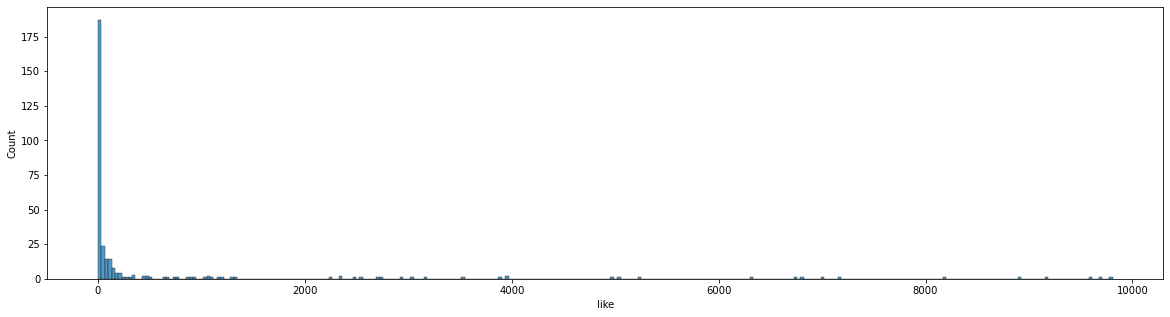

In [45]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_playlists, x='like')

Ta có thể quan sát được số lượng lượt thích đa số nằm ở khu vực dưới 2000 , vậy nên số lượng playlists có lượt thích (like) cao là không nhiều.Playlist có lượt thích cao nhất là

In [47]:
df_playlists.iloc[df_playlists['like'].argmax()]

playlist_id                                                    104
playlist_name                             TalkToMeInKorean Level 1
playlist_url     https://www.soundcloud.com/talktomeinkorean/se...
owner_id                                                       864
username                                          TalkToMeInKorean
playlist_time                             2013-01-23T08:58:51.000Z
playlist_tag                                             Education
like                                                          9808
repost                                                         918
size                                                            26
tracks           [2776, 2777, 2778, 2779, 2780, 2781, 2782, 278...
Name: 104, dtype: object

# Mối quan hệ giữa số lượng track, lượt like, repost

<AxesSubplot:xlabel='size', ylabel='Density'>

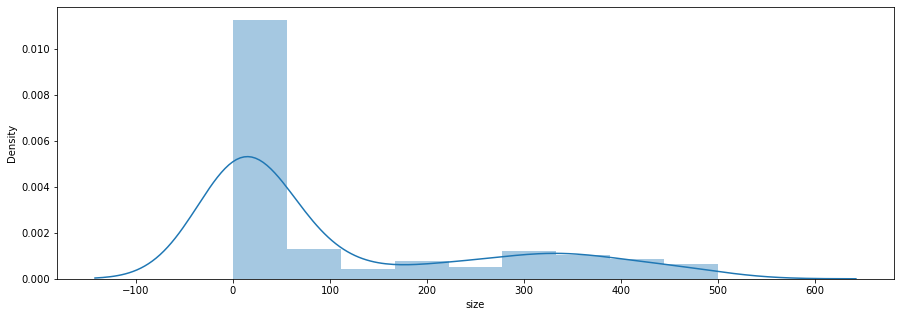

In [57]:
plt.figure(figsize=(15,5))
sns.distplot(df_playlists["size"])

Bên trên ta xem phân bố số lượng bài hát trong các playlists như thế nào. Tiếp theo, ta xem có bất kì mối quan hệ gì không so với các biến như lượt thích (like) và phát lại (repost).

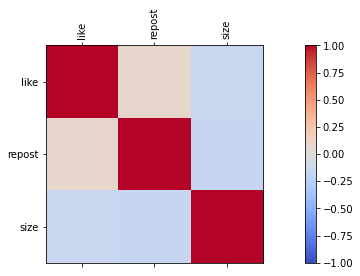

In [61]:
h2 = df_playlists[['like', 'repost', 'size']]
corr = h2.corr()
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(h2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(h2.columns)
ax.set_yticklabels(h2.columns)
plt.show()

Ta có thể thấy số lượng track hoàn toàn không ảnh hưởng đến các chỉ số khác 